# Data Exploration
This python file will process all the meaningful features of the dataset in numerous graph visualizations and descriptive statistics. The features selected will be: Date Occured, Days After Occurred Crime, Mocodes, Victim Age, Victim Sex, Victim Descent, Area, Crime Code, District, Top Crime Types, Part 1 or 2 Crimes, and Status. Each section can be split up into isolating the features, organizing them for visualization, then transforming to bar graphs, pie charts, or other form of visualization.

For discussion about the features, please read the comments or any intermediary text boxes

**Authors:** Kevin Lu, Shrusti Jain, Smeet Patel, Taobo Liao


# Imports and Graph Configurations

In [7]:
import numpy as np
import pandas as pd
import datetime
#%matplotlib notebook
import matplotlib.pyplot as plt

In [8]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5,
}
plt.rcParams.update(params)

In [9]:
#download train and debug
!gdown 1enR3DLH7iDuI0mG8rV3Z21tPhdZZRXOv
!gdown 1zeyltSH_KaN0qQCRCiZR8kXOG6VUXU9T

Downloading...
From (original): https://drive.google.com/uc?id=1enR3DLH7iDuI0mG8rV3Z21tPhdZZRXOv
From (redirected): https://drive.google.com/uc?id=1enR3DLH7iDuI0mG8rV3Z21tPhdZZRXOv&confirm=t&uuid=a712fe38-9987-4c60-b827-02e7278b7d5c
To: c:\Users\jain9\Predicting_LA_Crimes\src\train.pkl

  0%|          | 0.00/224M [00:00<?, ?B/s]
  0%|          | 524k/224M [00:00<00:44, 4.99MB/s]
  1%|▏         | 3.15M/224M [00:00<00:14, 15.2MB/s]
  2%|▏         | 5.24M/224M [00:00<00:12, 17.2MB/s]
  3%|▎         | 7.34M/224M [00:00<00:11, 18.6MB/s]
  4%|▍         | 9.96M/224M [00:00<00:11, 19.4MB/s]
  5%|▌         | 12.1M/224M [00:00<00:10, 19.6MB/s]
  7%|▋         | 14.7M/224M [00:00<00:10, 20.2MB/s]
  8%|▊         | 17.3M/224M [00:00<00:10, 20.3MB/s]
  9%|▊         | 19.4M/224M [00:01<00:09, 20.5MB/s]
 10%|▉         | 21.5M/224M [00:01<00:09, 20.6MB/s]
 11%|█         | 23.6M/224M [00:01<00:09, 20.6MB/s]
 11%|█▏        | 25.7M/224M [00:01<00:09, 20.7MB/s]
 12%|█▏        | 27.8M/224M [00:01<00:09, 20.7

In [10]:
crime_df = pd.read_pickle('train.pkl')

Getting missing values from each column to understand the bias of data.

In [11]:
nan_counts = crime_df.isna().sum()

# Display the NaN counts
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           146435
Vict Age               0
Vict Sex          139575
Vict Descent      139586
Premis Cd             14
Premis Desc          585
Weapon Used Cd    660132
Weapon Desc       660132
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          917588
Crm Cd 3          984190
Crm Cd 4          986436
LOCATION               0
Cross Street      834230
LAT                    0
LON                    0
dtype: int64


In [12]:
crime_df.loc[np.random.randint(0, crime_df.shape[0])]

DR_NO                                          210714263
Date Rptd                            2021-10-11 00:00:00
DATE OCC                             2021-10-09 00:00:00
TIME OCC                                            1215
AREA                                                   7
AREA NAME                                       Wilshire
Rpt Dist No                                          705
Part 1-2                                               1
Crm Cd                                               440
Crm Cd Desc           THEFT PLAIN - PETTY ($950 & UNDER)
Mocodes                                        1822 0344
Vict Age                                              28
Vict Sex                                               F
Vict Descent                                           W
Premis Cd                                          146.0
Premis Desc                                       PATIO*
Weapon Used Cd                                       NaN
Weapon Desc                    

# Data Exploration (Division of Records Number)

'DR_NO' refers to the division of records number, which is an official file number used for indexing. As can be seen below, it is unique for each value. It consists of a 2 digit year, area ID, and 5 digits.

In [13]:
print(f'Is the DR_NO unique? {crime_df["DR_NO"].is_unique}')
print(f'Are there any missing DR_NO? {crime_df["DR_NO"].isnull().values.any()}')

Is the DR_NO unique? True
Are there any missing DR_NO? False


# Data Exploration (Date Occurred)

'DATE OCC' refers to the date of the crime's occurence. It is originally given in YYYY-MM-DD HH:MM:SS format, where the time is always midnight, and has been converted to a pandas timestamp. There are no null values, as can be seen below.

In [14]:
print(f'Are there any missing dates? {crime_df["DATE OCC"].isnull().values.any()}')

Are there any missing dates? False


In [15]:
print(f'The earliest crime in the dataset occurred on {crime_df["DATE OCC"].min().date()} and the latest crime on {crime_df["DATE OCC"].max().date()}.')

The earliest crime in the dataset occurred on 2020-01-01 and the latest crime on 2024-10-14.


### The histogram displaying crime over time is unreadable if done per month, so below I display it per month and also per month per year.

<Axes: xlabel='DATE OCC'>

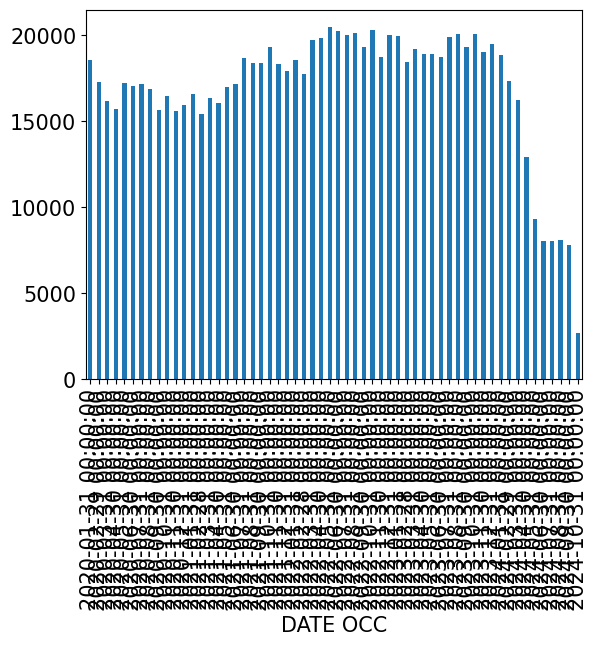

In [16]:
#histogram of crime per each month in the dataset
crime_df.set_index('DATE OCC').resample('ME').size().plot.bar()

For the following diagrams, the label on the x-axis describes the end date at which data in this bucket seizes to be collected. For example, in the diagram directly below, the first bar corresponds to crime in 2020, beginning on the 1st and ending on the 31st day of December.

<Axes: xlabel='DATE OCC'>

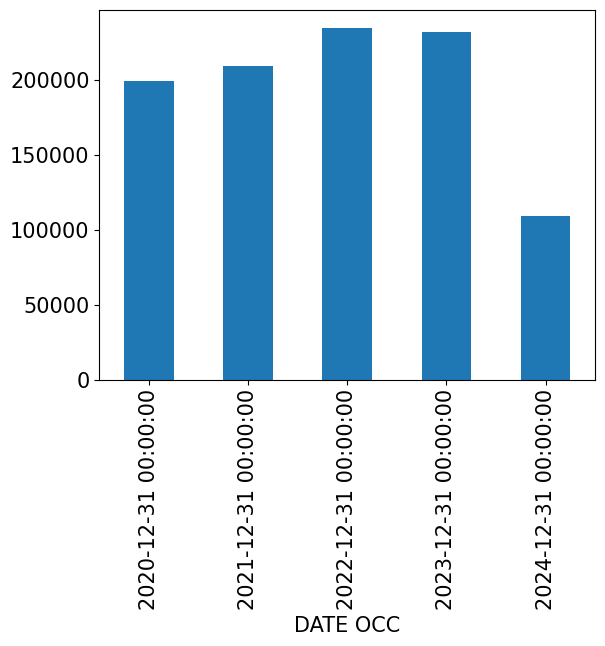

In [17]:
#histogram of crime per year in the dataset
crime_df.set_index('DATE OCC').resample('YE').size().plot.bar()

<Axes: xlabel='DATE OCC'>

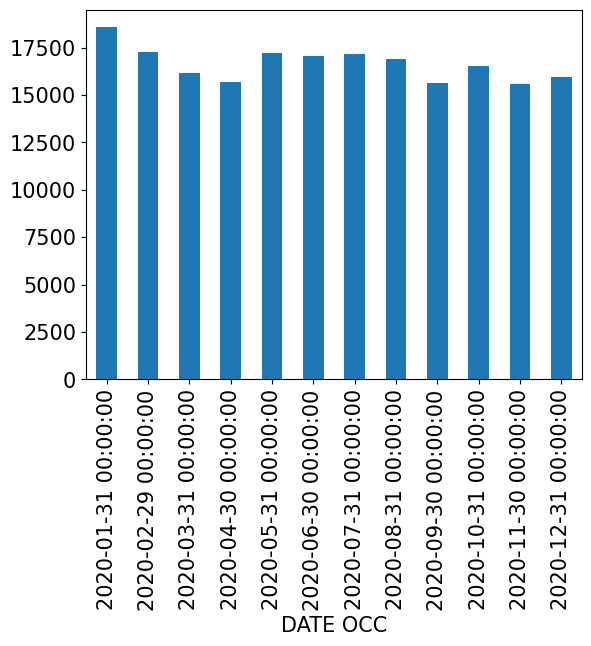

In [18]:
#Crime across 2020
crime_df[crime_df['DATE OCC'] < datetime.datetime(2021, 1, 1)].set_index('DATE OCC').resample('ME').size().plot.bar()

<Axes: xlabel='DATE OCC'>

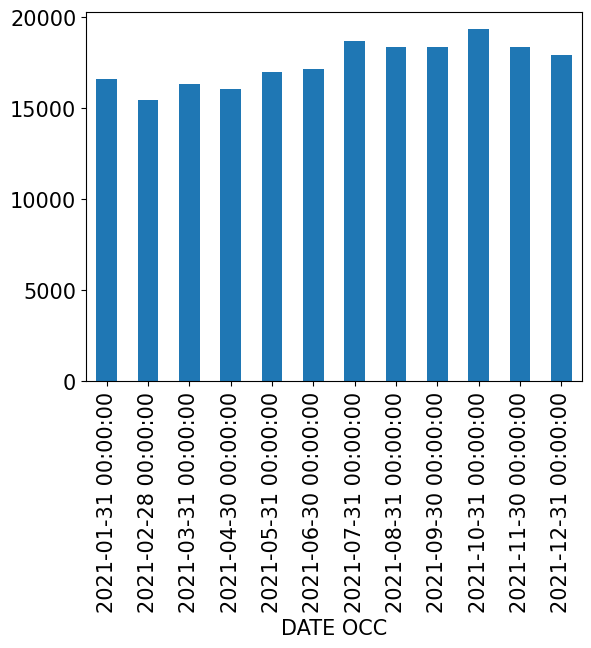

In [19]:
#Crime across 2021
crime_df[(crime_df['DATE OCC'] < datetime.datetime(2022, 1, 1)) & (crime_df['DATE OCC'] >= datetime.datetime(2021, 1, 1))].set_index('DATE OCC').resample('ME').size().plot.bar()

<Axes: xlabel='DATE OCC'>

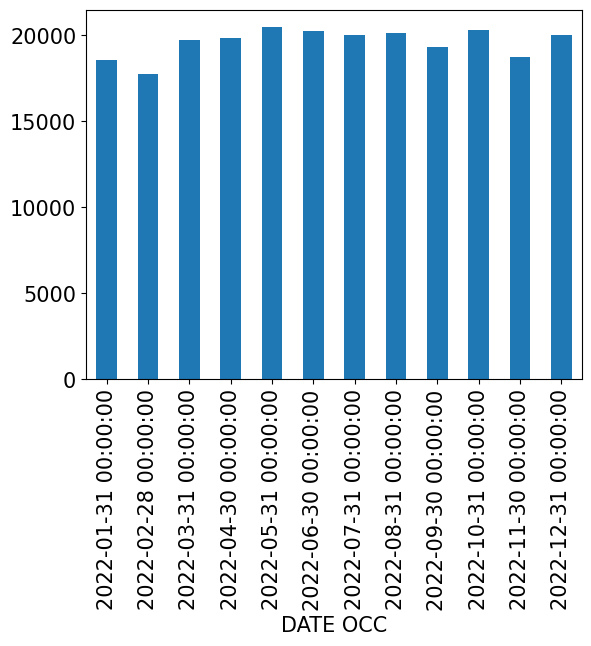

In [20]:
#Crime across 2022
crime_df[(crime_df['DATE OCC'] < datetime.datetime(2023, 1, 1)) & (crime_df['DATE OCC'] >= datetime.datetime(2022, 1, 1))].set_index('DATE OCC').resample('ME').size().plot.bar()

<Axes: xlabel='DATE OCC'>

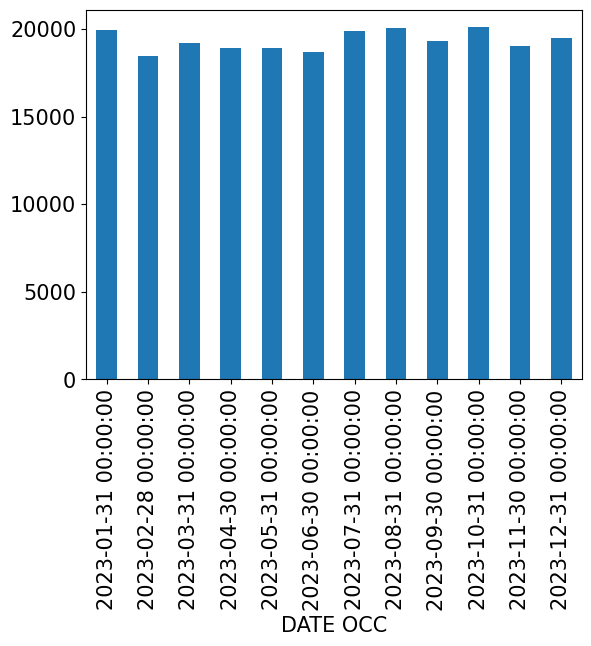

In [21]:
#Crime across 2023
crime_df[(crime_df['DATE OCC'] < datetime.datetime(2024, 1, 1)) & (crime_df['DATE OCC'] >= datetime.datetime(2023, 1, 1))].set_index('DATE OCC').resample('ME').size().plot.bar()

<Axes: xlabel='DATE OCC'>

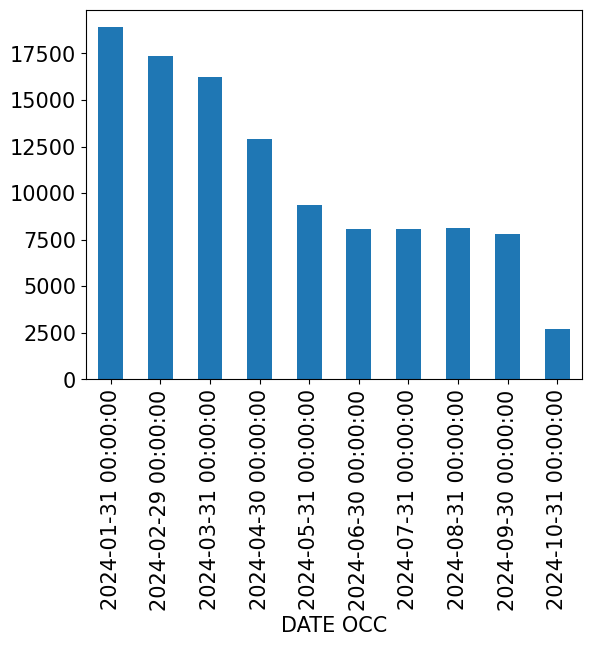

In [22]:
#Crime across 2024. Note that not all 2024 data is available.
crime_df[(crime_df['DATE OCC'] < datetime.datetime(2025, 1, 1)) & (crime_df['DATE OCC'] >= datetime.datetime(2024, 1, 1))].set_index('DATE OCC').resample('ME').size().plot.bar()

In [23]:
#average number of crimes per day, week, month, and year
print(f'Average crimes per day are {crime_df.set_index("DATE OCC").resample("D").size().mean()} with a standard deviation of {crime_df.set_index("DATE OCC").resample("D").size().std()}.')
print(f'Average crimes per week are {crime_df.set_index("DATE OCC").resample("W").size().mean()} with a standard deviation of {crime_df.set_index("DATE OCC").resample("W").size().std()}.')
print(f'Average crimes per month are {crime_df.set_index("DATE OCC").resample("ME").size().mean()} with a standard deviation of {crime_df.set_index("DATE OCC").resample("ME").size().std()}.')
print(f'Average crimes per year are {crime_df.set_index("DATE OCC").resample("YE").size().mean()} with a standard deviation of {crime_df.set_index("DATE OCC").resample("YE").size().std()}.')

Average crimes per day are 564.0365923384792 with a standard deviation of 130.98420271339435.
Average crimes per week are 3930.2788844621514 with a standard deviation of 838.74197815082.
Average crimes per month are 17008.620689655174 with a standard deviation of 3731.8333570078807.
Average crimes per year are 197300.0 with a standard deviation of 51268.97441435707.


### Crime Numbers VS Day Time Hours & Area

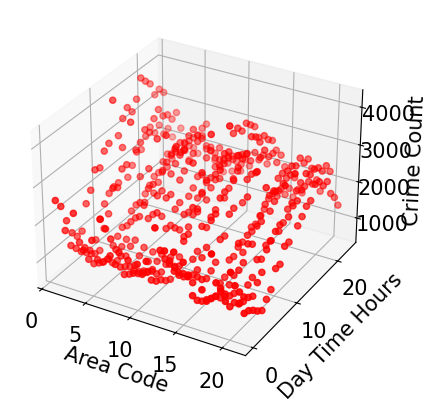

In [24]:
crime_df['HOUR'] = crime_df['TIME OCC'] // 100  # divided by 100 to get hour

crime_counts = crime_df.groupby(['AREA', 'HOUR']).size().reset_index(name='CRIME COUNT')

x = crime_counts['AREA']
y = crime_counts['HOUR']
z = crime_counts['CRIME COUNT']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Area Code')
ax.set_ylabel('Day Time Hours')
ax.set_zlabel('Crime Count')
plt.show()


# Data Exploration (Days After Occurred Crime)

Days after occurred crime represents the amount of days elapsed after the crime was committed that it was reported

In [25]:
# Adding an additional column for the days after occurred crime
crime_df['Date Rptd'] = pd.to_datetime(crime_df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
crime_df['DATE OCC'] = pd.to_datetime(crime_df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
crime_df['Days After Occurred'] = (crime_df['Date Rptd'] - crime_df['DATE OCC']).dt.days

# Descriptive Statistics
mean_days = crime_df['Days After Occurred'].mean()
std_days = crime_df['Days After Occurred'].std()
median_days = crime_df['Days After Occurred'].median()
print("Mean Days " + str(mean_days))
print("Std days " + str(std_days))
print("Median Days " + str(median_days))

Mean Days 11.907232640648758
Std days 67.19848427555475
Median Days 1.0


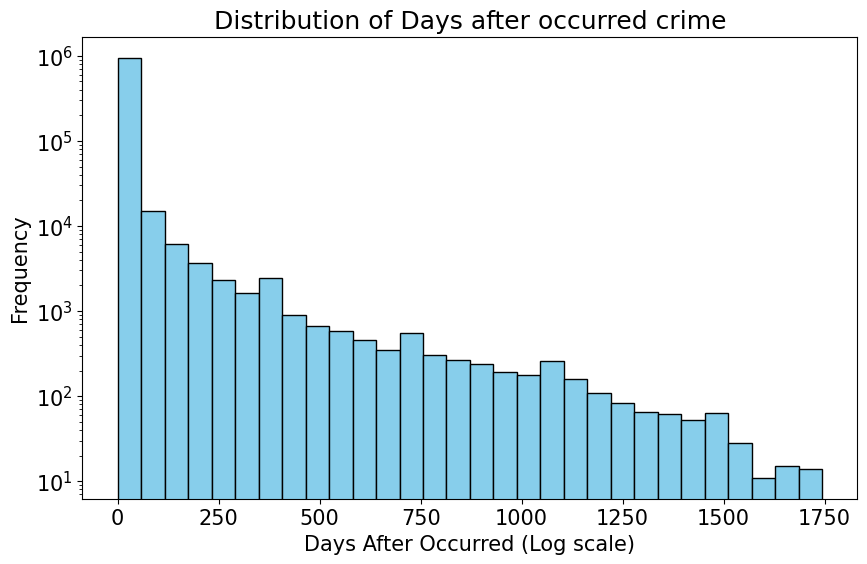

In [26]:
# Visualization
plt.figure(figsize=(10, 6))
plt.title("Distribution of Days after occurred crime")
plt.hist(crime_df['Days After Occurred'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.xlabel("Days After Occurred (Log scale)")
plt.ylabel("Frequency")
plt.show()

Our initial thought was that the number of days after occurred crime was reported would be heavily influenced by location. This is because some locations may have denser population or more police activity which would cause crimes to be reported faster. Although there is a slight variation, most areas seems to have similar mean and std.

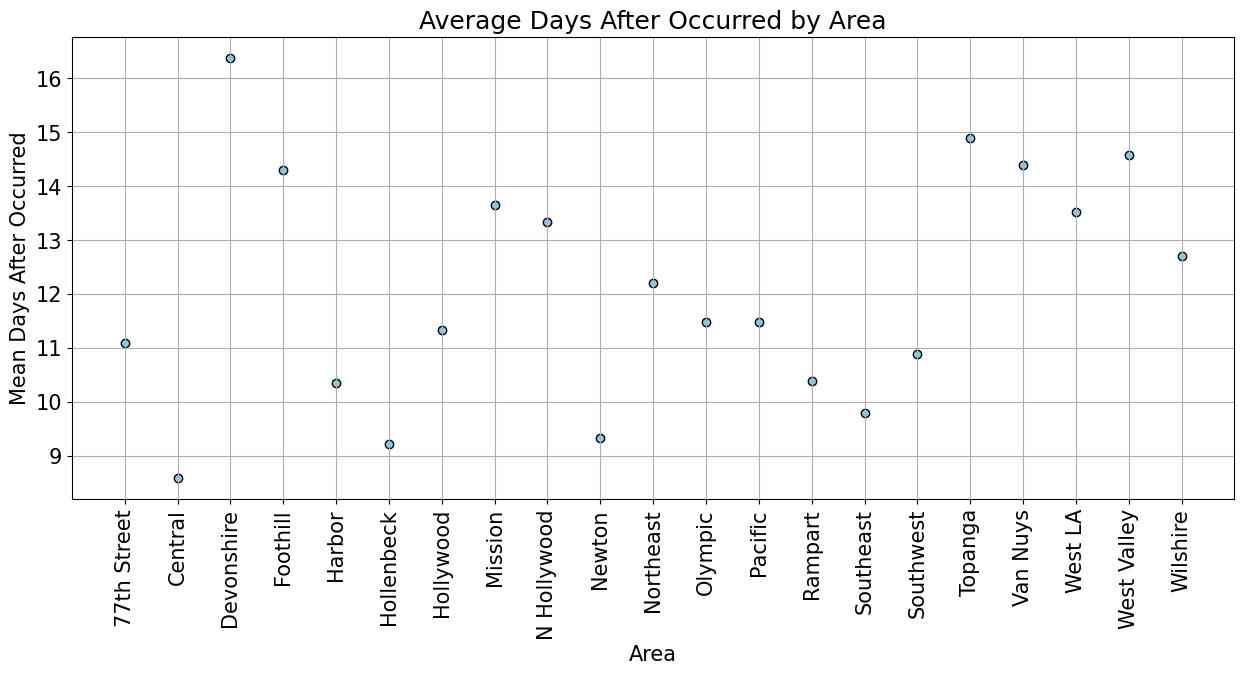

In [27]:
# Visualization in relation to Area
mean_days_by_area_name = crime_df.groupby('AREA NAME')['Days After Occurred'].mean()
plt.figure(figsize=(15, 6))
plt.scatter(mean_days_by_area_name.index, mean_days_by_area_name.values, color='skyblue', edgecolor='black')
plt.title("Average Days After Occurred by Area")
plt.xlabel("Area")
plt.ylabel("Mean Days After Occurred")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [28]:
std_days_by_area_name = crime_df.groupby('AREA NAME')['Days After Occurred'].std()
#mean_days_by_area_name.head(30)
std_days_by_area_name.head(30)

AREA NAME
77th Street    74.542589
Central        53.051549
Devonshire     78.121562
Foothill       73.255217
Harbor         63.362897
Hollenbeck     56.202052
Hollywood      66.318548
Mission        74.417306
N Hollywood    69.562063
Newton         64.625685
Northeast      62.730886
Olympic        66.362388
Pacific        56.968937
Rampart        65.128493
Southeast      66.870989
Southwest      66.790981
Topanga        75.551176
Van Nuys       69.858083
West LA        66.175587
West Valley    75.155488
Wilshire       68.422354
Name: Days After Occurred, dtype: float64

# Data Exploration (Mocodes)

Mocodes represent the activities associated with the commission of the crime. For example, bag was used, mask was worn, gloves were worn, etc.

In [29]:
# Number of Mocodes per crime, number of NaN Mocodes
na_count = crime_df['Mocodes'].isna().sum()
crime_df_mocodes = crime_df.dropna(subset=['Mocodes'])
mocode_counts = crime_df_mocodes['Mocodes'].str.split(' ').str.len()
mean_mocode_count = mocode_counts.mean()

print("Mean number of Mocodes per row:", mean_mocode_count)
print(f"Number of rows dropped due to NaN in 'Mocodes': {na_count}")

Mean number of Mocodes per row: 3.4837732794486143
Number of rows dropped due to NaN in 'Mocodes': 146435


In [30]:
# Visualization of Mocode frequency
mocode_counts = crime_df_mocodes['Mocodes'].str.split(' ')
all_mocodes = [code for sublist in mocode_counts for code in sublist]
mocode_series = pd.Series(all_mocodes)
mocode_frequency = mocode_series.value_counts()
retained_classes = mocode_frequency[mocode_frequency>2000].index
print("Number of Mocodes: " + str(len(retained_classes)))

Number of Mocodes: 138


Due to the number unique Mocodes, we will select only the top 10 mocodes to be visualized. This will provide a better visualization.

1822: Stranger
0344: Removed Victim Property
0913: Victim Knew Suspect
0329: Vandalized
0416: Hit-Hit w/ Weapon
1300: Vehicle Involved
0400: Force Used
2000: Domestic Violence
1402: Evidence Booked
2004: Suspect is Homeless


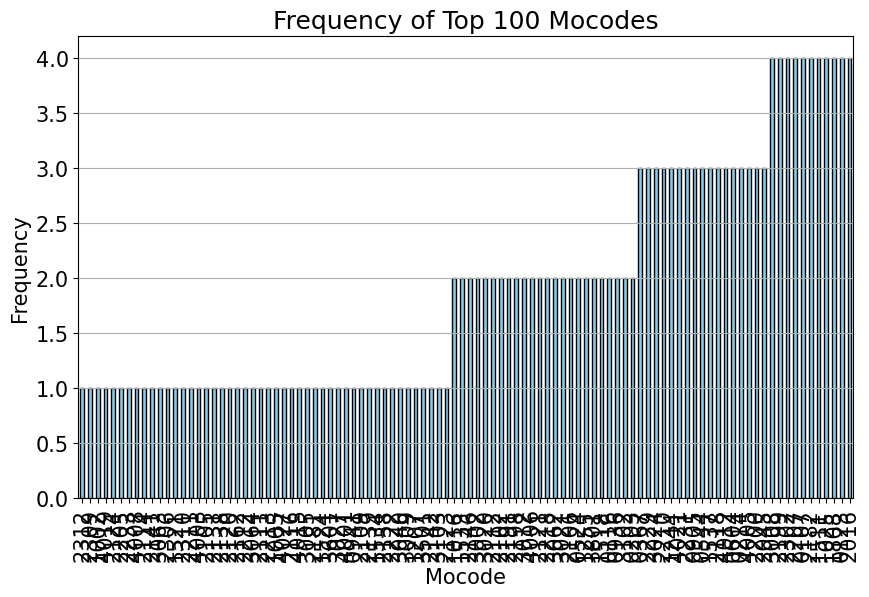

In [31]:
top_n = 100
top_mocode_frequency = mocode_frequency.nsmallest(top_n)

plt.figure(figsize=(10, 6))
top_mocode_frequency.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Frequency of Top {top_n} Mocodes")
plt.xlabel("Mocode")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.grid(axis='y')
meanings_text = (
    "1822: Stranger\n"
    "0344: Removed Victim Property\n"
    "0913: Victim Knew Suspect\n"
    "0329: Vandalized\n"
    "0416: Hit-Hit w/ Weapon\n"
    "1300: Vehicle Involved\n"
    "0400: Force Used\n"
    "2000: Domestic Violence\n"
    "1402: Evidence Booked\n"
    "2004: Suspect is Homeless"
)
print(meanings_text)
plt.show()

# Data Exploration (Victim Age, Sex, Descent)

One big thing to note is that this these histograms and bar graphs are not normalized by the size of its respective population. Within the Victim Descent graph, it is shown that most victims are hispanic, white, and black but this could be because they are the largest populations.

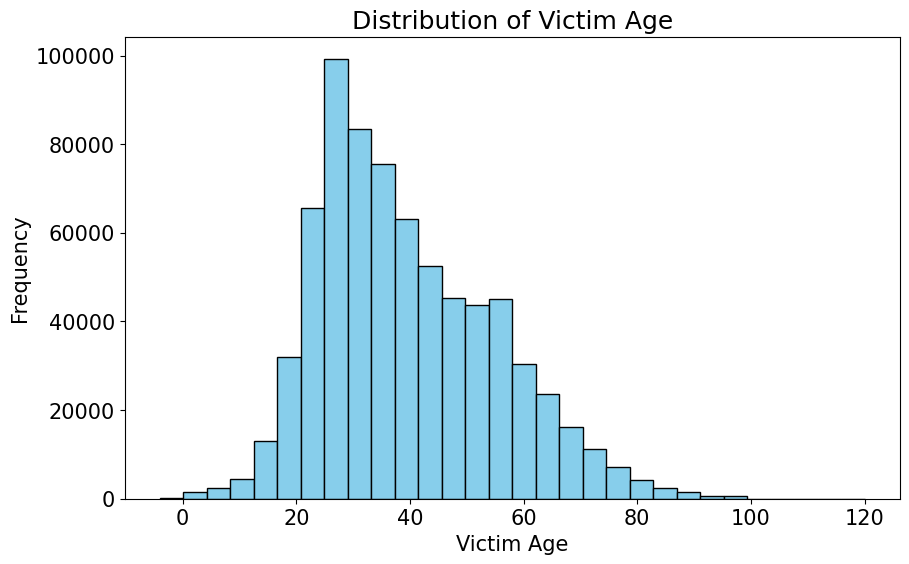

Number of rows dropped due to 'Vict Age' being 0: 261421


In [32]:
# Visualization of Victim Age and printing number of rows dropped due to vict age being 0
zero_vict_age_count = (crime_df['Vict Age'] == 0).sum()
crime_df_victs = crime_df[crime_df['Vict Age'] != 0]
plt.figure(figsize=(10, 6))
plt.title("Distribution of Victim Age")
plt.hist(crime_df_victs['Vict Age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.show()
print(f"Number of rows dropped due to 'Vict Age' being 0: {zero_vict_age_count}")

In [33]:
# Descriptive Statistics
mean_age = crime_df_victs['Vict Age'].mean()
std_age = crime_df_victs['Vict Age'].std()
median_age = crime_df_victs['Vict Age'].median()
print("Mean Age " + str(mean_age))
print("Std Age " + str(std_age))
print("Median Age " + str(median_age))

Mean Age 39.5171657157358
Std Age 15.597508115773923
Median Age 37.0


Vict Sex
Male              364882
Female            349841
Unknown            10214
Non-Conforming       110
Name: count, dtype: int64


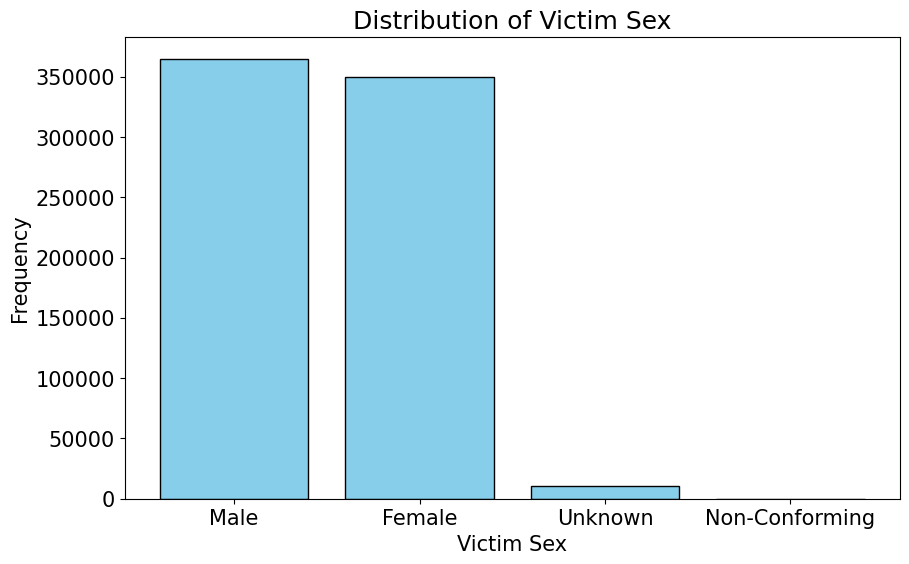

In [34]:
# Frequency distribution of Victim Sex
sex_mapping = {
    'M': 'Male',
    'F': 'Female',
    'X': 'Unknown',
    'H': 'Non-Conforming'
}
vict_sex_counts = crime_df_victs['Vict Sex'].replace(sex_mapping).value_counts()
print(vict_sex_counts)
plt.figure(figsize=(10, 6))
plt.title("Distribution of Victim Sex")
plt.bar(vict_sex_counts.index, vict_sex_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Victim Sex")
plt.ylabel("Frequency")
plt.show()

Vict Descent
Hispanic            288258
White               183174
Black               132897
Other                63767
Other Asian          20747
Unknown              16737
Korean                5692
Filipino              4572
Chinese               4323
Japanese              1503
Vietnamese            1122
American Indian        979
Asian Indian           537
Pacific Islander       278
Hawaiian               177
Cambodian               88
Laotian                 73
Guamanian               72
Samoan                  50
-                        1
Name: count, dtype: int64


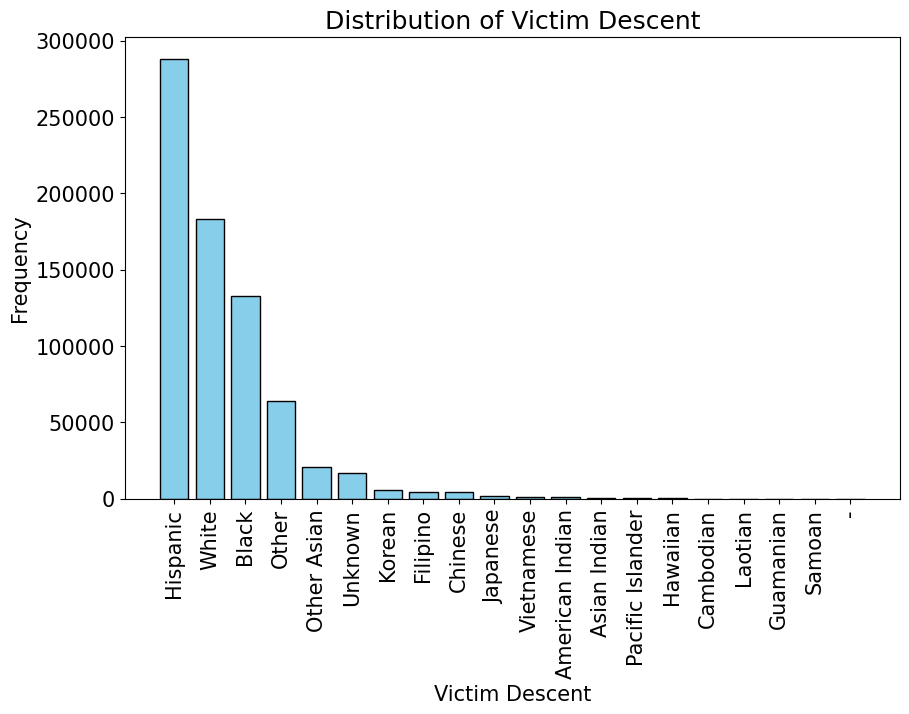

In [35]:
# Frequency distribution of Victim Descent
desc_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
vict_desc_counts = crime_df_victs['Vict Descent'].replace(desc_mapping).value_counts()
print(vict_desc_counts)
plt.figure(figsize=(10, 6))
plt.title("Distribution of Victim Descent")
plt.bar(vict_desc_counts.index, vict_desc_counts.values, color='skyblue', edgecolor='black')
plt.xlabel("Victim Descent")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

# Data Exploration (Area, Crime Code, District)

AREA NAME
Central        68166
77th Street    61018
Pacific        58087
Southwest      56259
Hollywood      51510
N Hollywood    50197
Southeast      49263
Olympic        49211
Newton         48422
Wilshire       47272
Rampart        46001
West LA        44848
Van Nuys       42059
Northeast      42050
West Valley    41452
Devonshire     40985
Harbor         40603
Topanga        40591
Mission        39572
Hollenbeck     36287
Foothill       32647
Name: count, dtype: int64


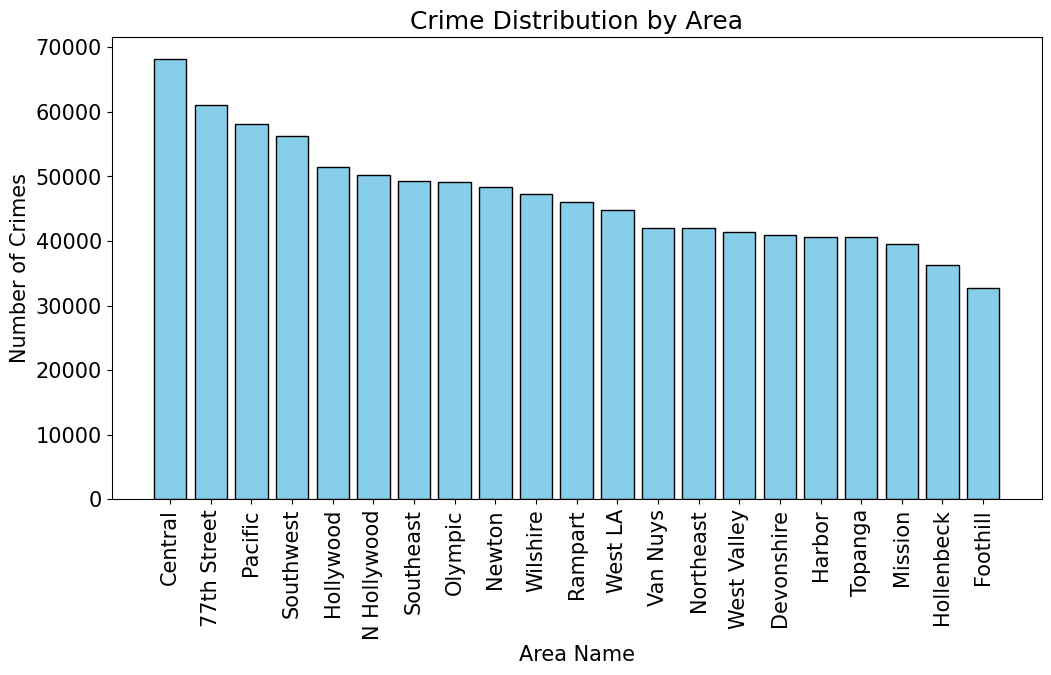

In [36]:
# Frequency distrubution for Area vs Number of crimes
crime_count_area = crime_df['AREA NAME'].value_counts()
print(crime_count_area)
plt.figure(figsize=(12, 6))
plt.title("Crime Distribution by Area")
plt.bar(crime_count_area.index, crime_count_area.values, color='skyblue', edgecolor='black')
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

## Pivot table of Area vs Crime code 1

In [37]:
grouped_data = crime_df.groupby(['AREA NAME','Crm Cd']).size()
pivot_table = grouped_data.reset_index().pivot(index='Crm Cd', columns='AREA NAME', values= 0)
pivot_table

AREA NAME,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Crm Cd,,,,,,,,,,,,,,,,,,,,,
110,237.0,102.0,29.0,41.0,80.0,144.0,44.0,46.0,50.0,134.0,...,60.0,35.0,84.0,206.0,83.0,33.0,30.0,9.0,31.0,36.0
113,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,1.0
121,315.0,356.0,113.0,113.0,145.0,114.0,236.0,163.0,193.0,191.0,...,214.0,160.0,249.0,193.0,228.0,134.0,83.0,140.0,156.0,138.0
122,25.0,24.0,6.0,11.0,12.0,9.0,17.0,13.0,8.0,14.0,...,26.0,16.0,16.0,19.0,23.0,11.0,9.0,12.0,17.0,15.0
210,3803.0,2660.0,842.0,736.0,1022.0,1129.0,2038.0,1008.0,1129.0,2275.0,...,1837.0,1094.0,2051.0,2627.0,2012.0,931.0,911.0,661.0,927.0,1520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,4.0,2.0,7.0,11.0,11.0,3.0,6.0,4.0,2.0,1.0,...,4.0,NaN,3.0,6.0,3.0,4.0,5.0,5.0,5.0,2.0
950,1.0,4.0,1.0,1.0,4.0,NaN,14.0,5.0,3.0,1.0,...,6.0,7.0,1.0,NaN,NaN,1.0,2.0,5.0,1.0,17.0
951,6.0,40.0,9.0,3.0,22.0,3.0,43.0,14.0,13.0,7.0,...,31.0,26.0,7.0,7.0,7.0,9.0,23.0,20.0,7.0,28.0


## Pivot table of Area vs Crime Reported District Code

In [38]:
grouped_data_dist = crime_df.groupby(['AREA NAME','Rpt Dist No']).size()
pivot_table_1 = grouped_data_dist.reset_index().pivot(index='Rpt Dist No', columns='AREA NAME', values= 0)
pivot_table_1

AREA NAME,77th Street,Central,Devonshire,Foothill,Harbor,Hollenbeck,Hollywood,Mission,N Hollywood,Newton,...,Olympic,Pacific,Rampart,Southeast,Southwest,Topanga,Van Nuys,West LA,West Valley,Wilshire
Rpt Dist No,,,,,,,,,,,,,,,,,,,,,
101,NaN,921.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,3782.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1932.0,NaN,NaN,NaN,NaN
2196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,468.0,NaN,NaN,NaN,NaN
2197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,183.0,NaN,NaN,NaN,NaN


# Data Exploration (Top Crime Types)

Similar to earlier, we will use the top 20 types of crimes to be selected and visualized due the number of unique crime descriptions

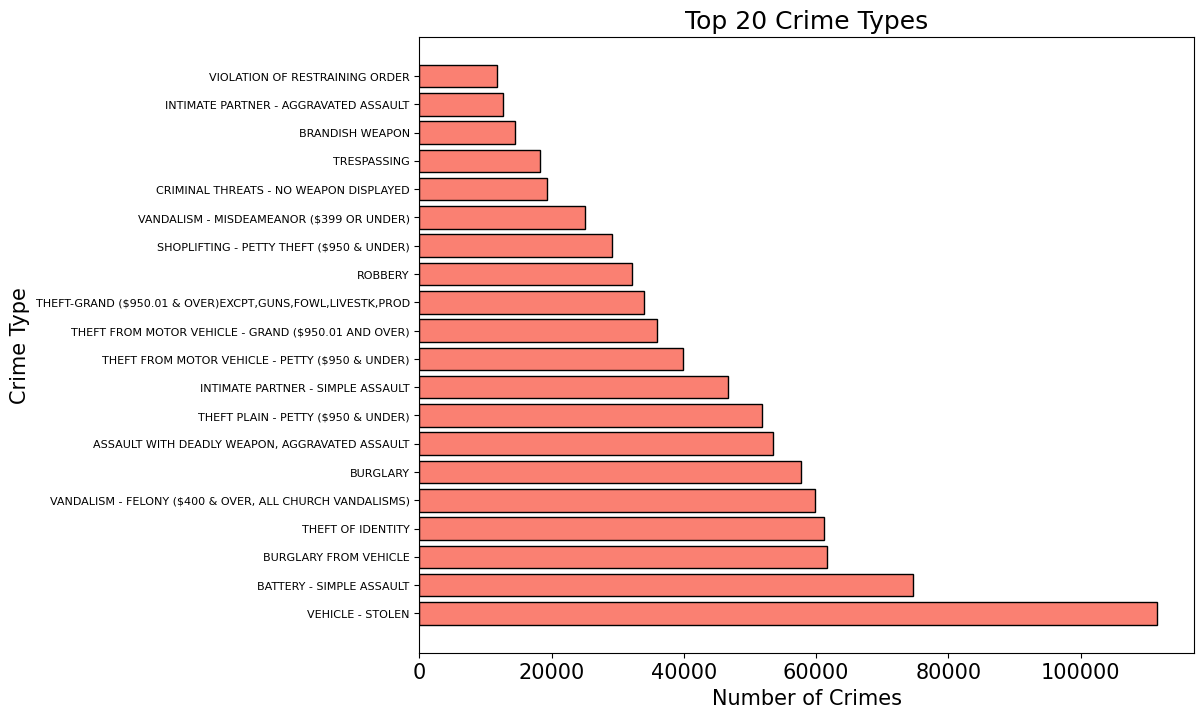

In [39]:
# Frequency distribution of top 20 types of crimes and number of crimes
top_crime_types = crime_df['Crm Cd Desc'].value_counts().head(20)

plt.figure(figsize=(10, 8))
plt.title("Top 20 Crime Types")
plt.barh(top_crime_types.index, top_crime_types.values, color='salmon', edgecolor='black')
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.yticks(fontsize = 8)
plt.show()

## Top 20 Districts of Crime occurence

Again, we will be using the top 20 districts in frequency of crimes for easier visualization.

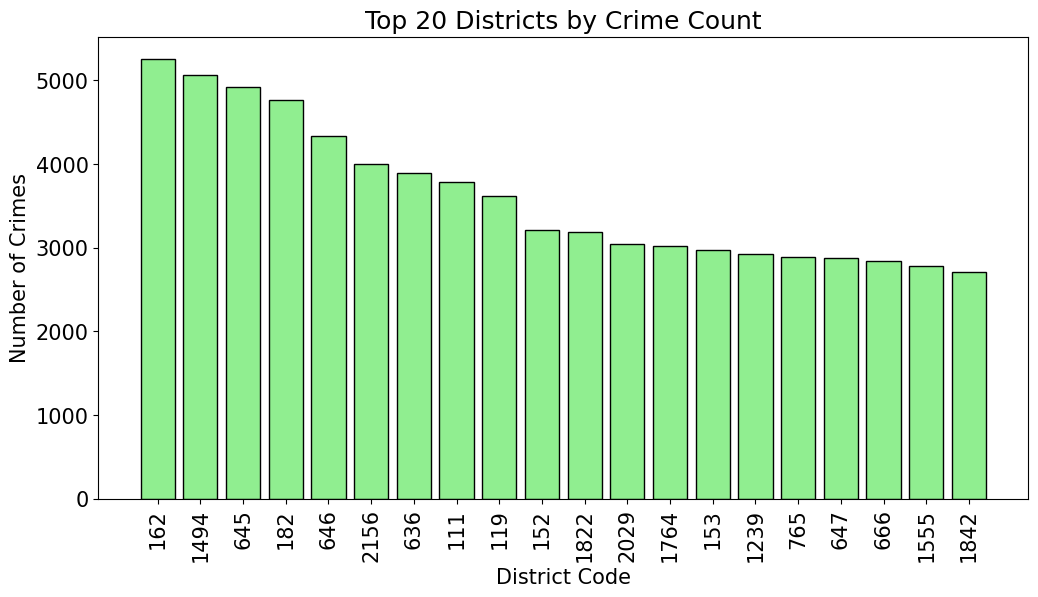

In [40]:
# Top 20 districts in frequency of crimes distribution
top_districts = crime_df['Rpt Dist No'].value_counts().head(20)

plt.figure(figsize=(12, 6))
plt.title("Top 20 Districts by Crime Count")
plt.bar(top_districts.index.astype(str), top_districts.values, color='lightgreen', edgecolor='black')
plt.xlabel("District Code")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)
plt.show()

### Weapon used (top 10 most frequently used)

In the dataset, there are 80 different types of weapons used. Since some weapons occur infrequently, we'll keep only the top 10 most frequently used weapons as separate features and group all other types under a single category named "OTHER". This approach helps reduce the number of features while preserving the most important information.    
Moreover, the "NaN" in weapon description is replaced by "NONE".

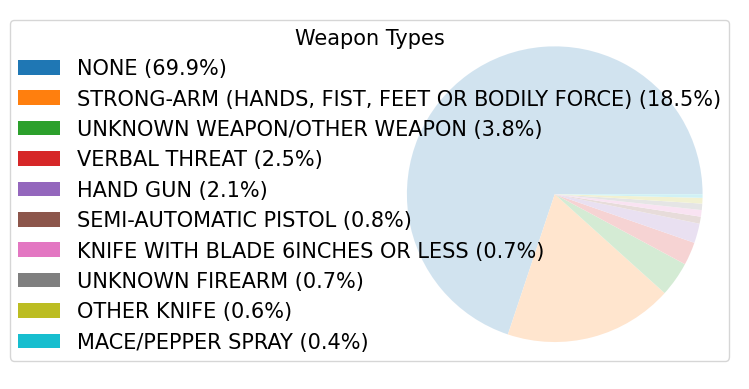

In [41]:
# Replace NaN values with "NONE" in 'Weapon Desc'
crime_df['Weapon Desc'] = crime_df['Weapon Desc'].fillna('NONE')

WeaponUsed = crime_df['Weapon Desc'].unique()
WUCtr = {wu: 0 for wu in WeaponUsed}

for wd in crime_df['Weapon Desc']:
    WUCtr[wd] += 1

# Sort items by count in descending order
WUCtrItems = sorted(WUCtr.items(), key=lambda item: -item[1])
Ctr = []
Labels = []

total_count = sum([count for _, count in WUCtrItems[:10]])
for l, c in WUCtrItems[:10]:
    Ctr.append(c)
    percentage = (c / total_count) * 100
    Labels.append(f"{l} ({percentage:.1f}%)")

fig, ax = plt.subplots()
ax.pie(Ctr, labels=None)
ax.legend(Labels, title="Weapon Types", loc="best")
plt.show()


# Data Exploration (Part 1 or 2 Crimes)

Part 1 and 2 crimes are different types of crimes. Part 1 are more serious offenses and are used in calculating the crime rate, including crimes like murder, rape, and aggravated assault. Part 2 crimes include vandalism, fraud, and driving under the influence.

In [42]:
print(f'There are {crime_df[crime_df["Part 1-2"]==1].shape[0]} part 1 crimes and {crime_df[crime_df["Part 1-2"]==2].shape[0]} part 2 crimes in the dataset.')

There are 588283 part 1 crimes and 398217 part 2 crimes in the dataset.


# Data Exploration (Status)

The status code refers to the status of the case. Status Desc is a plain-text description of what the status code means.

In [43]:
crime_df["Status Code + Desc"] = crime_df["Status"] + ": " + crime_df["Status Desc"]

# Mapping of status code vs the description
print(crime_df["Status Code + Desc"].unique())
print()
# Printing frequency of each status code within the dataset
print(crime_df["Status Code + Desc"].value_counts())
print()
crime_df["Status Code + Desc"] = crime_df["Status Code + Desc"].fillna('CC: UNK')
crime_df["Status"] = crime_df["Status"].fillna('CC')

['AA: Adult Arrest' 'IC: Invest Cont' 'AO: Adult Other' 'JA: Juv Arrest'
 'JO: Juv Other' 'CC: UNK' nan]

Status Code + Desc
IC: Invest Cont     788335
AO: Adult Other     107731
AA: Adult Arrest     85377
JA: Juv Arrest        3212
JO: Juv Other         1838
CC: UNK                  6
Name: count, dtype: int64



As can be seen, there are 6 types of status codes.



*   IC refers to a continuing investigation, and is the default, with 788335 cases in this status.
*   AA refers to an adult being arrested, with 85377 cases in this status.
*   JA refers to being a juvenile being arrested, with 3212 cases in this status.
*   AO stands for adult other, which is when something is done to an adult that is not arrest, with 107731 cases in this status.
*   JO stands for juvenile other, which is similar, with 1838 cases.
*   CC is used as a status code when the status of the incident is unknown, and there are strangely only 6 cases with this status.


Finally, there is a single column with a nan value for the status as well, however the status description is marked as UNK, as when the status code is CC. Therefore, the nan value is substituted with CC, increasing the number of CC cases to 7.


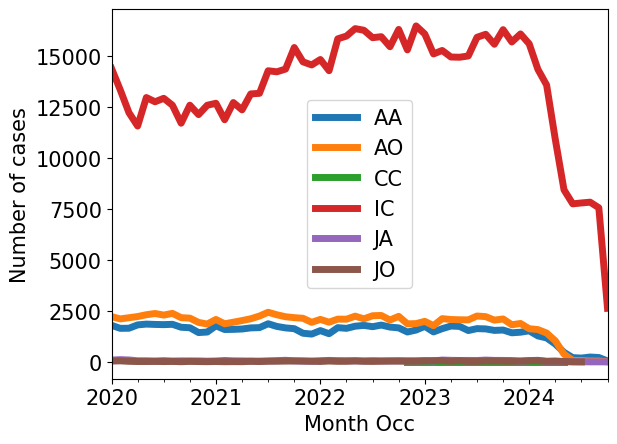

In [44]:
# Frequency line graph of month of concern vs number of cases
crime_df["Month Occ"] = crime_df["DATE OCC"].dt.to_period('M')
crime_df_graph = (crime_df.reset_index().groupby(["Month Occ", "Status"], as_index=False).count())
fig, ax = plt.subplots()
for key, data in crime_df_graph.groupby('Status'):
    data.plot(x="Month Occ", y='index', ax=ax, label=key, ylabel="Number of cases")
